# Rétropropagation : théorie et exemple
____

Dans ce cours nous allons expliquer ce fameux algorithme de rétropropagation et comment calculer les gradients avec. Nous allons tout d'abord commencer par présenter les concepts nécessaires à la compréhension de cette technique, ensuite nous allons vous montrer un exemple concret et pour finir, nous allons voir à quel point c'est facile de réaliser la rétropropagation sur PyTorch. Allons-y !

## I. La règle de la chaine

Prenons deux fonctions _f_ et _g_. Prenons ensuite un tenseur __x__ et appliquons _a(__x__)_ = __y__. Appliquons ensuite _b(__y__)_ = __z__ et schematisons tout ça sous forme d'un graphe. On obtient donc ce graphe :

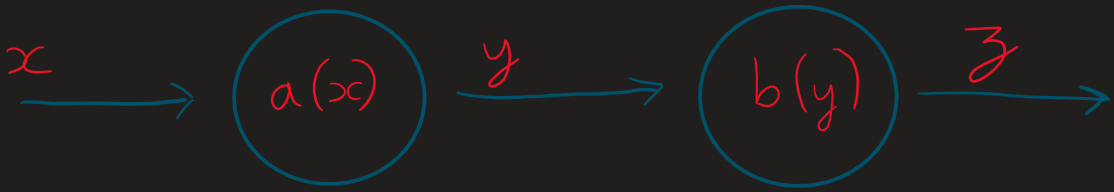

On a donc bien en entrée __x__ et en sortie __y__ pour le premier noeud avec l'application _a(__x__)_ et pour le deuxième noeud _b(__y__)_, on a bien __y__ en entrée et __z__ en sortie. Maintenant, nous voulons minimiser __z__ donc nous voulons connaître la dérivée __dz/dx__ que l'on peut obtenir avec la _règle de la chaine_. 

La règle de la chaine est le nom anglo-saxon donné au théorème de dérivation des fonctions composées. Soit deux fonctions dérivables f et g, alors leur composée _f_ o _g_ (ou _f(g(x))_ ) est dérivable et la dérivée est donnée par ___(f___ o ___g)'___ = ___(f'___ o ___g)___ __*__ ___g'___. Il est aussi possible de l'écrire sous la forme ___df/dx = df/dg * dg/dx___. 

Dans ce cas-là, ___dz/dx = dz/dy * dy/dx___ avec chacune des deux dérivées _dz/dy_ et _dy/dx_ associés à leurs noeuds respectifs. 

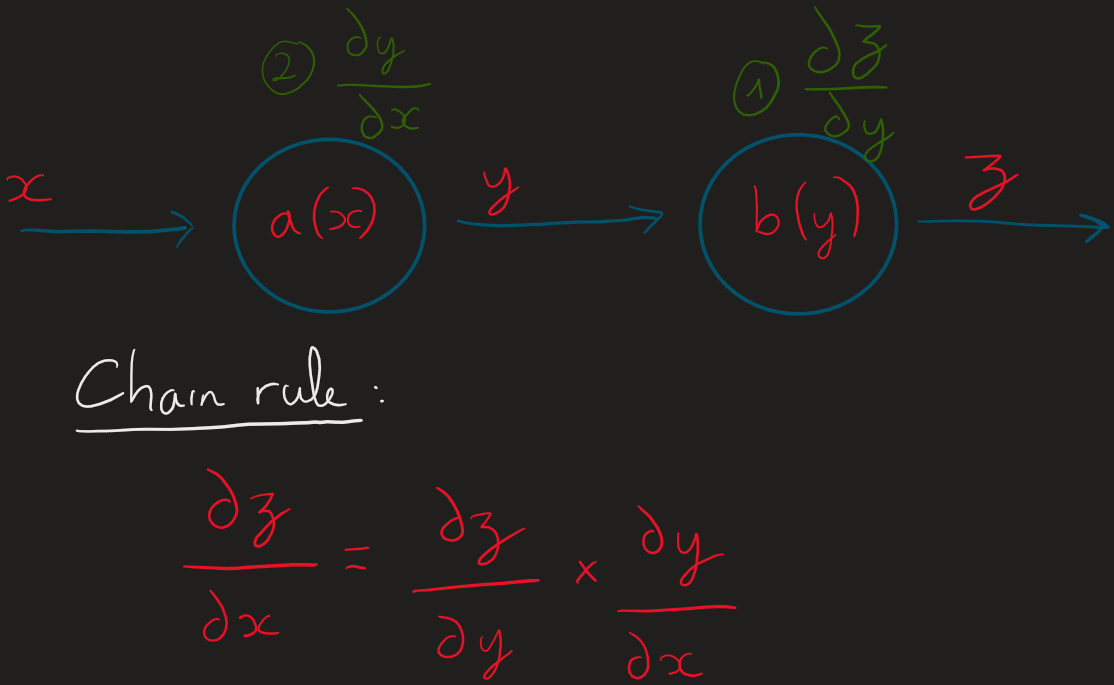

## II. Le graphe de calcul

Avec toutes les opérations effectuées sur nos tenseurs, PyTorch va effectuer un graphe de calcul. Sur chaque noeud nous appliquons une fonction avec une ou plusieurs entrées et une sortie. Dans cet exemple, nous allons utiliser la fonction ___f = x.y___ pour obtenir __z__. A ces noeuds nous pouvons calculer un gradient local que nous pouvons utiliser dans la règle de la chaine pour pouvoir calculer les autres gradients. 

Ici nous pouvons calculer deux gradients : __dz/dx__ et __dz/dy__. Or précédemment dit, ___z = x.y___ donc ___dz/dx = dx.y/dx = y___ et ___dz/dy = dx.y/dy = x___. Ici, les gradients locaux sont simples car nous connaissons la fonction utilisée. 

Un graph typique ne se résume pas à trois noeuds : il en possède beaucoup plus noeuds (et donc de fonction) et à la fin du graphe, nous calculons le __regret L__ que nous voulons minimiser. Donc nous devons calculer le gradient de ce regret L. 

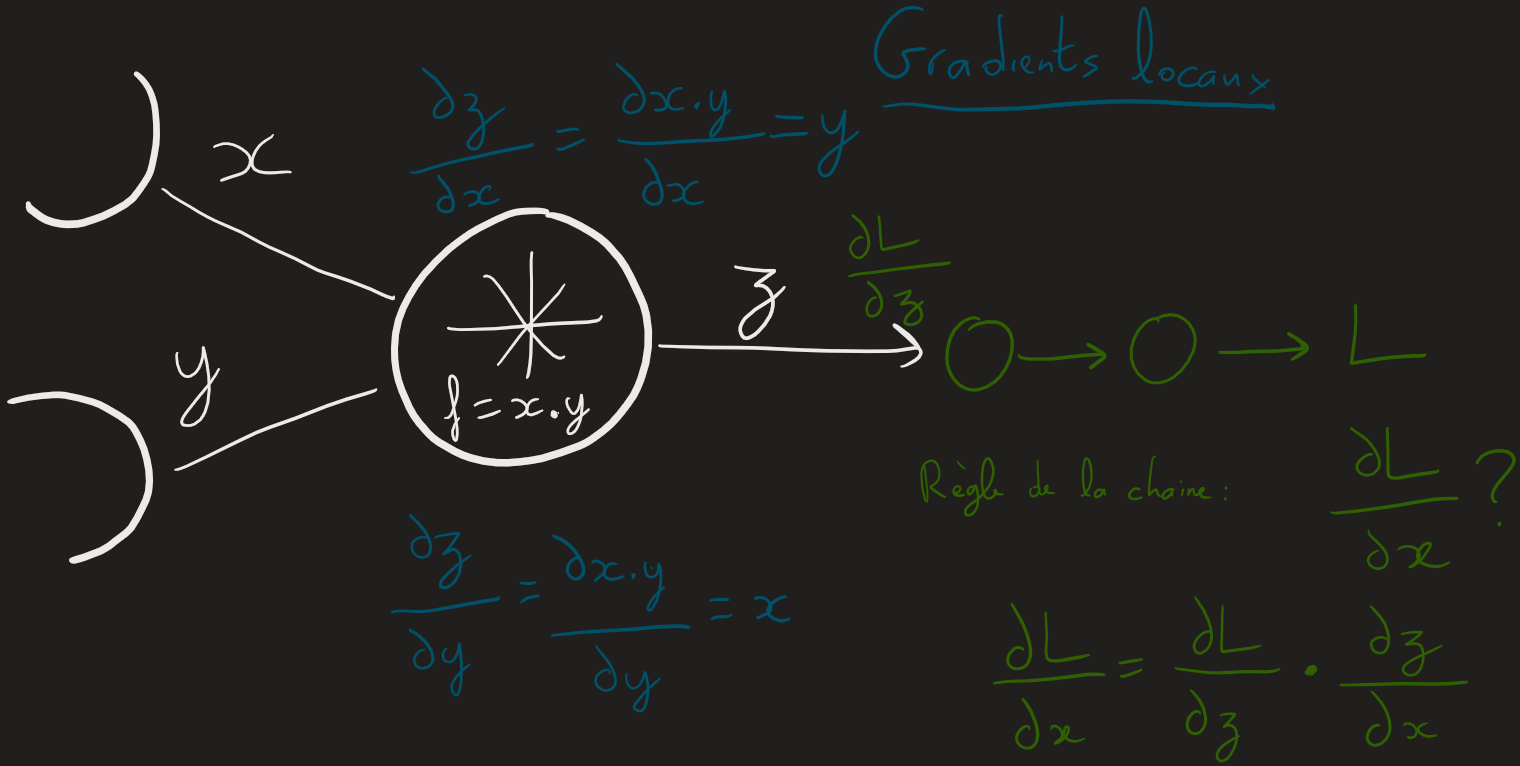

Tout le concept repose donc sur 3 étapes :

    1. Lecture en avant du graphe : calcul du regret L
    2. Calcul des gradients locaux 
    3. Rétropropagation : calcul de dL/dPoids (paramètres initiaux choisis) en utilisant la règle de la chaine
    
## III. Exemple concret 

Nous voulons utiliser un modèle de régression linéaire, dont voici le graphe :

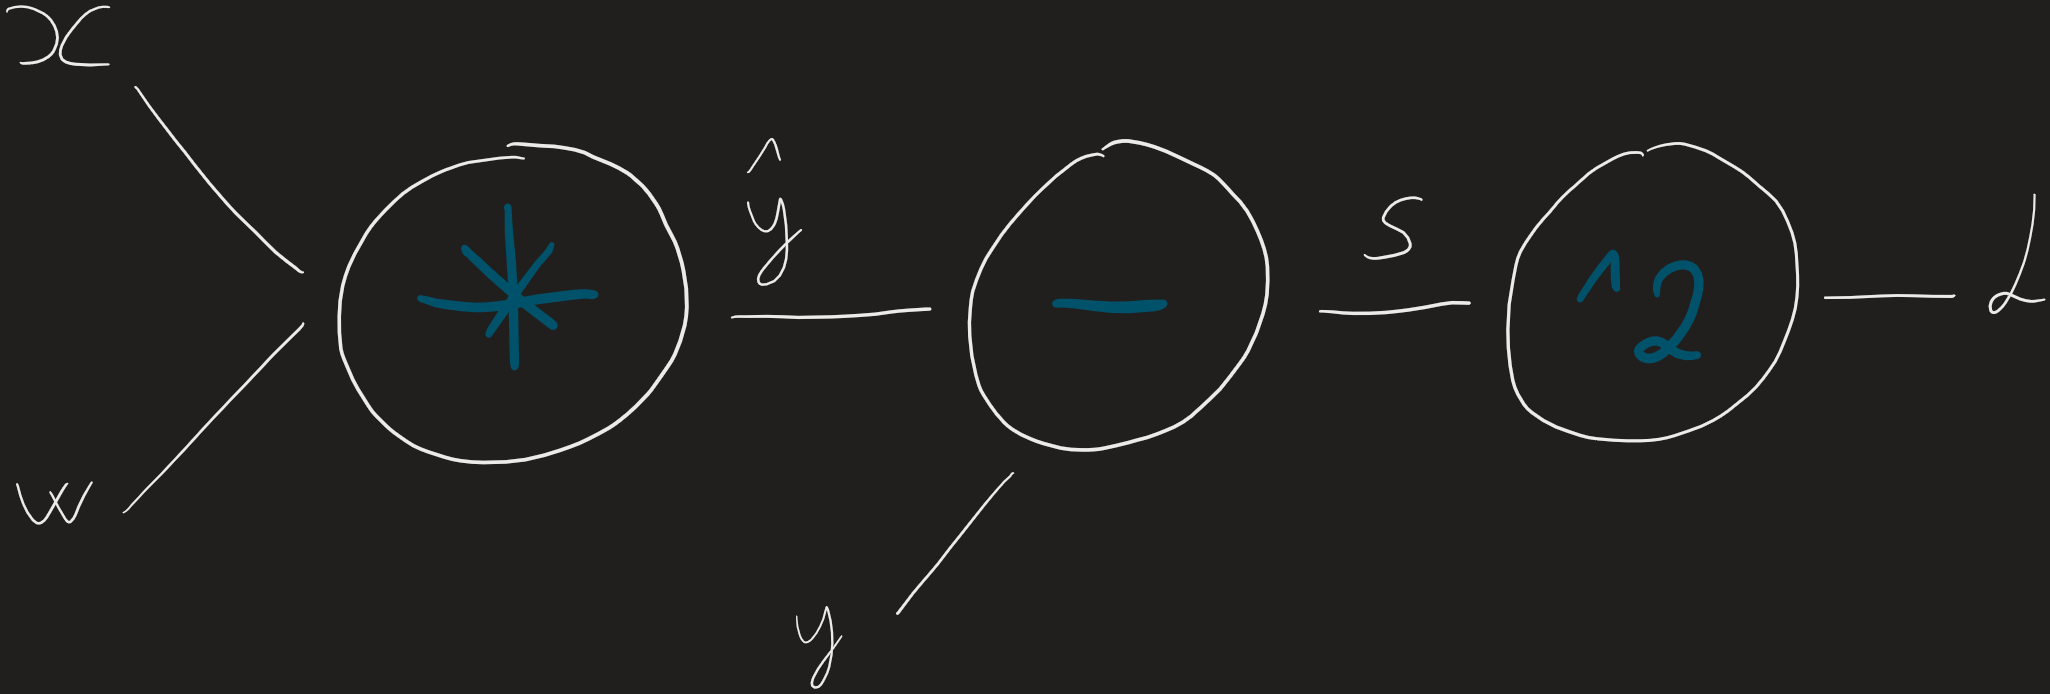

Nous voulons minimiser notre perte, et pour ce faire, nous appliquons nos trois étapes :

    1. Lecture en avant du graphe : calcul du regret L
    
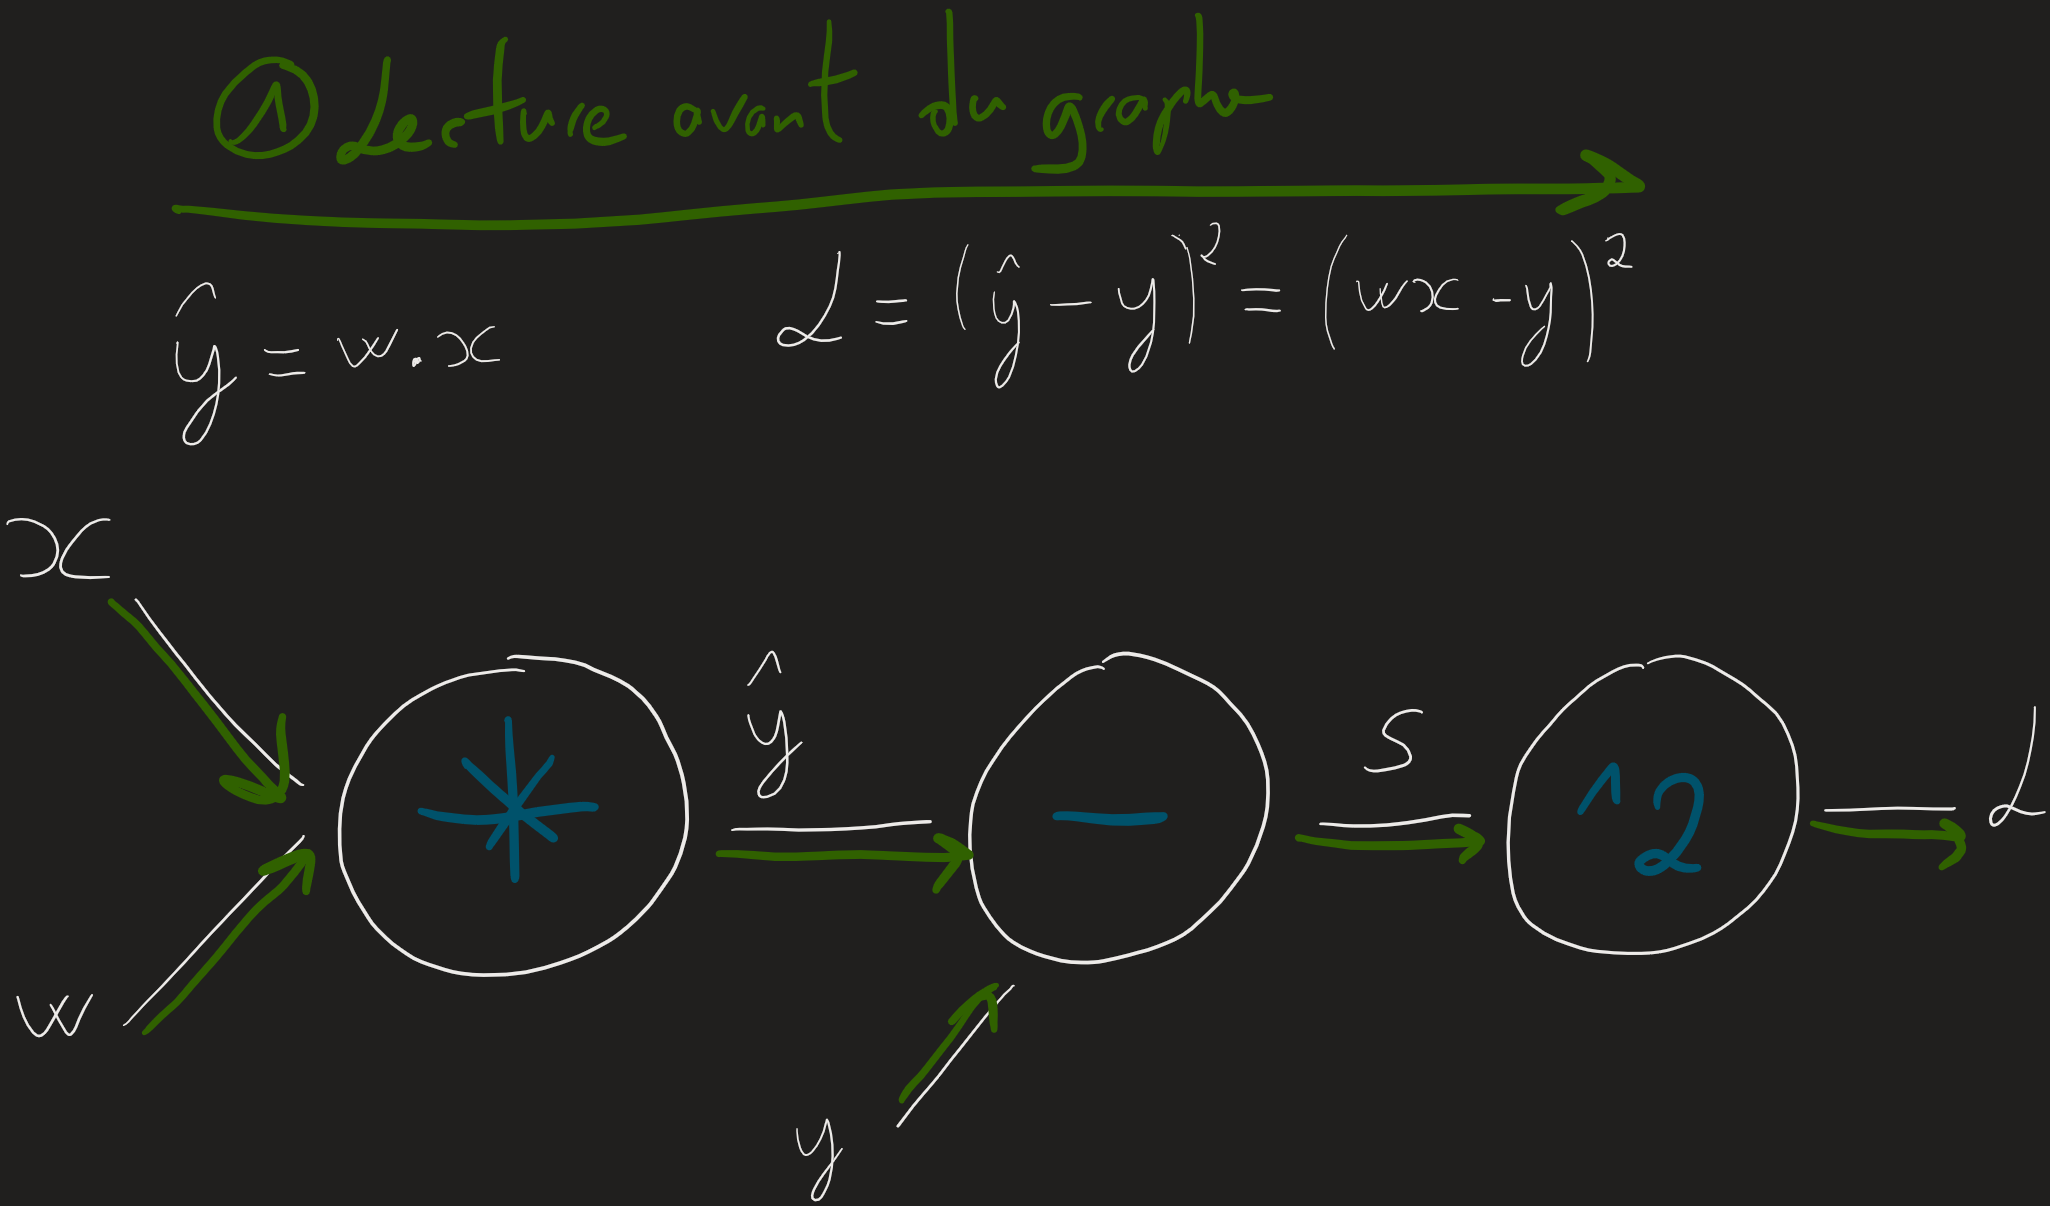

    2. Calcul des gradients locaux
    
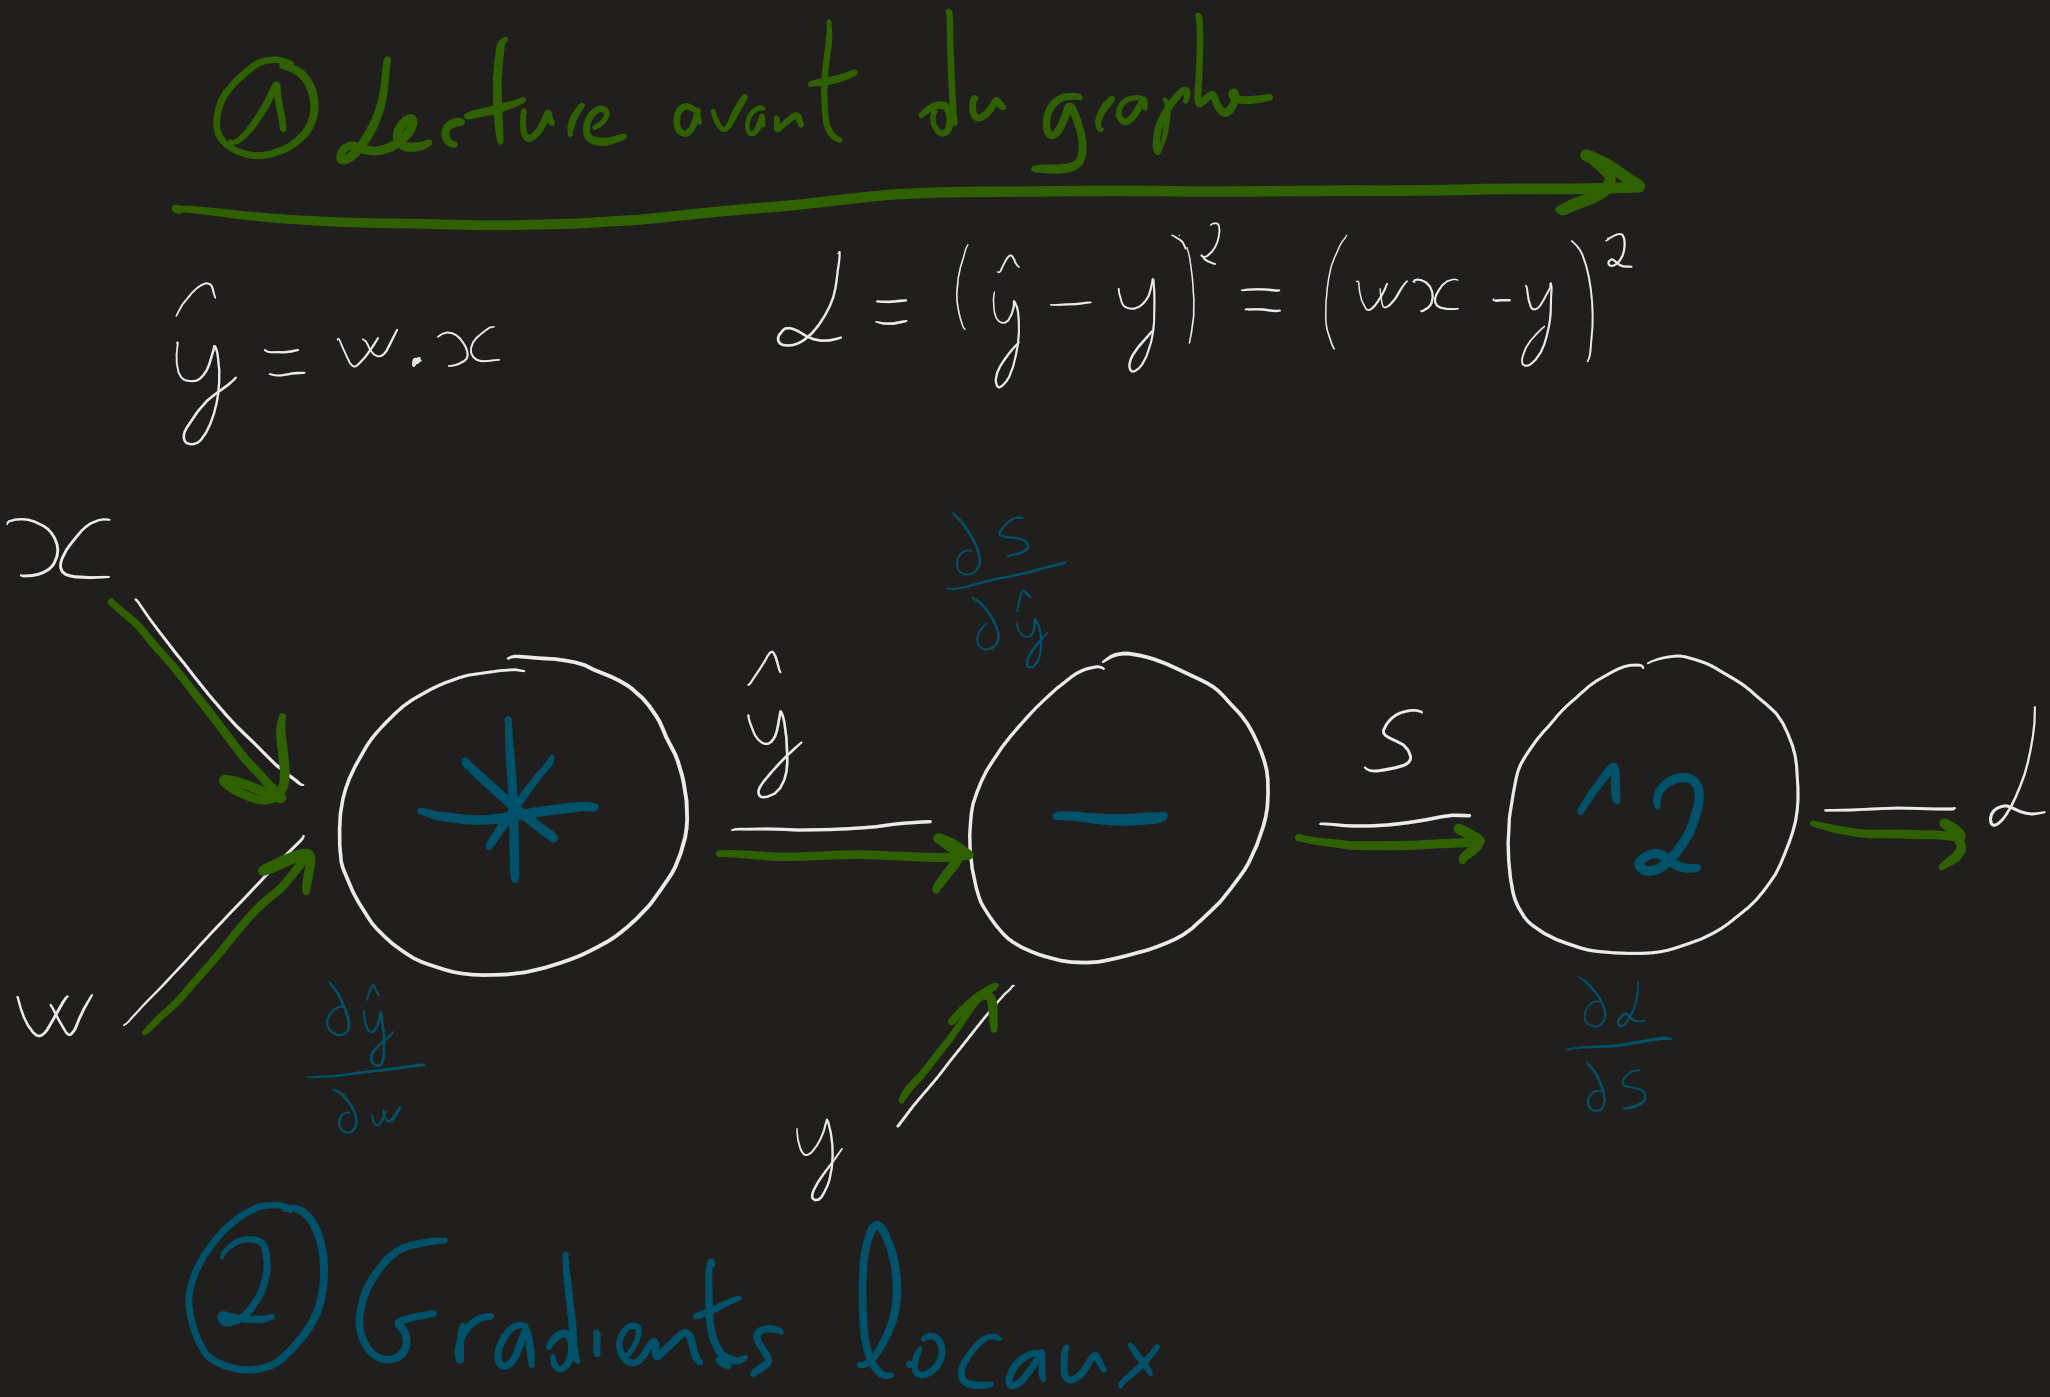
    
    3. Rétropropagation : calcul de dL/dPoids (paramètres initiaux choisis) en utilisant la règle de la chaine

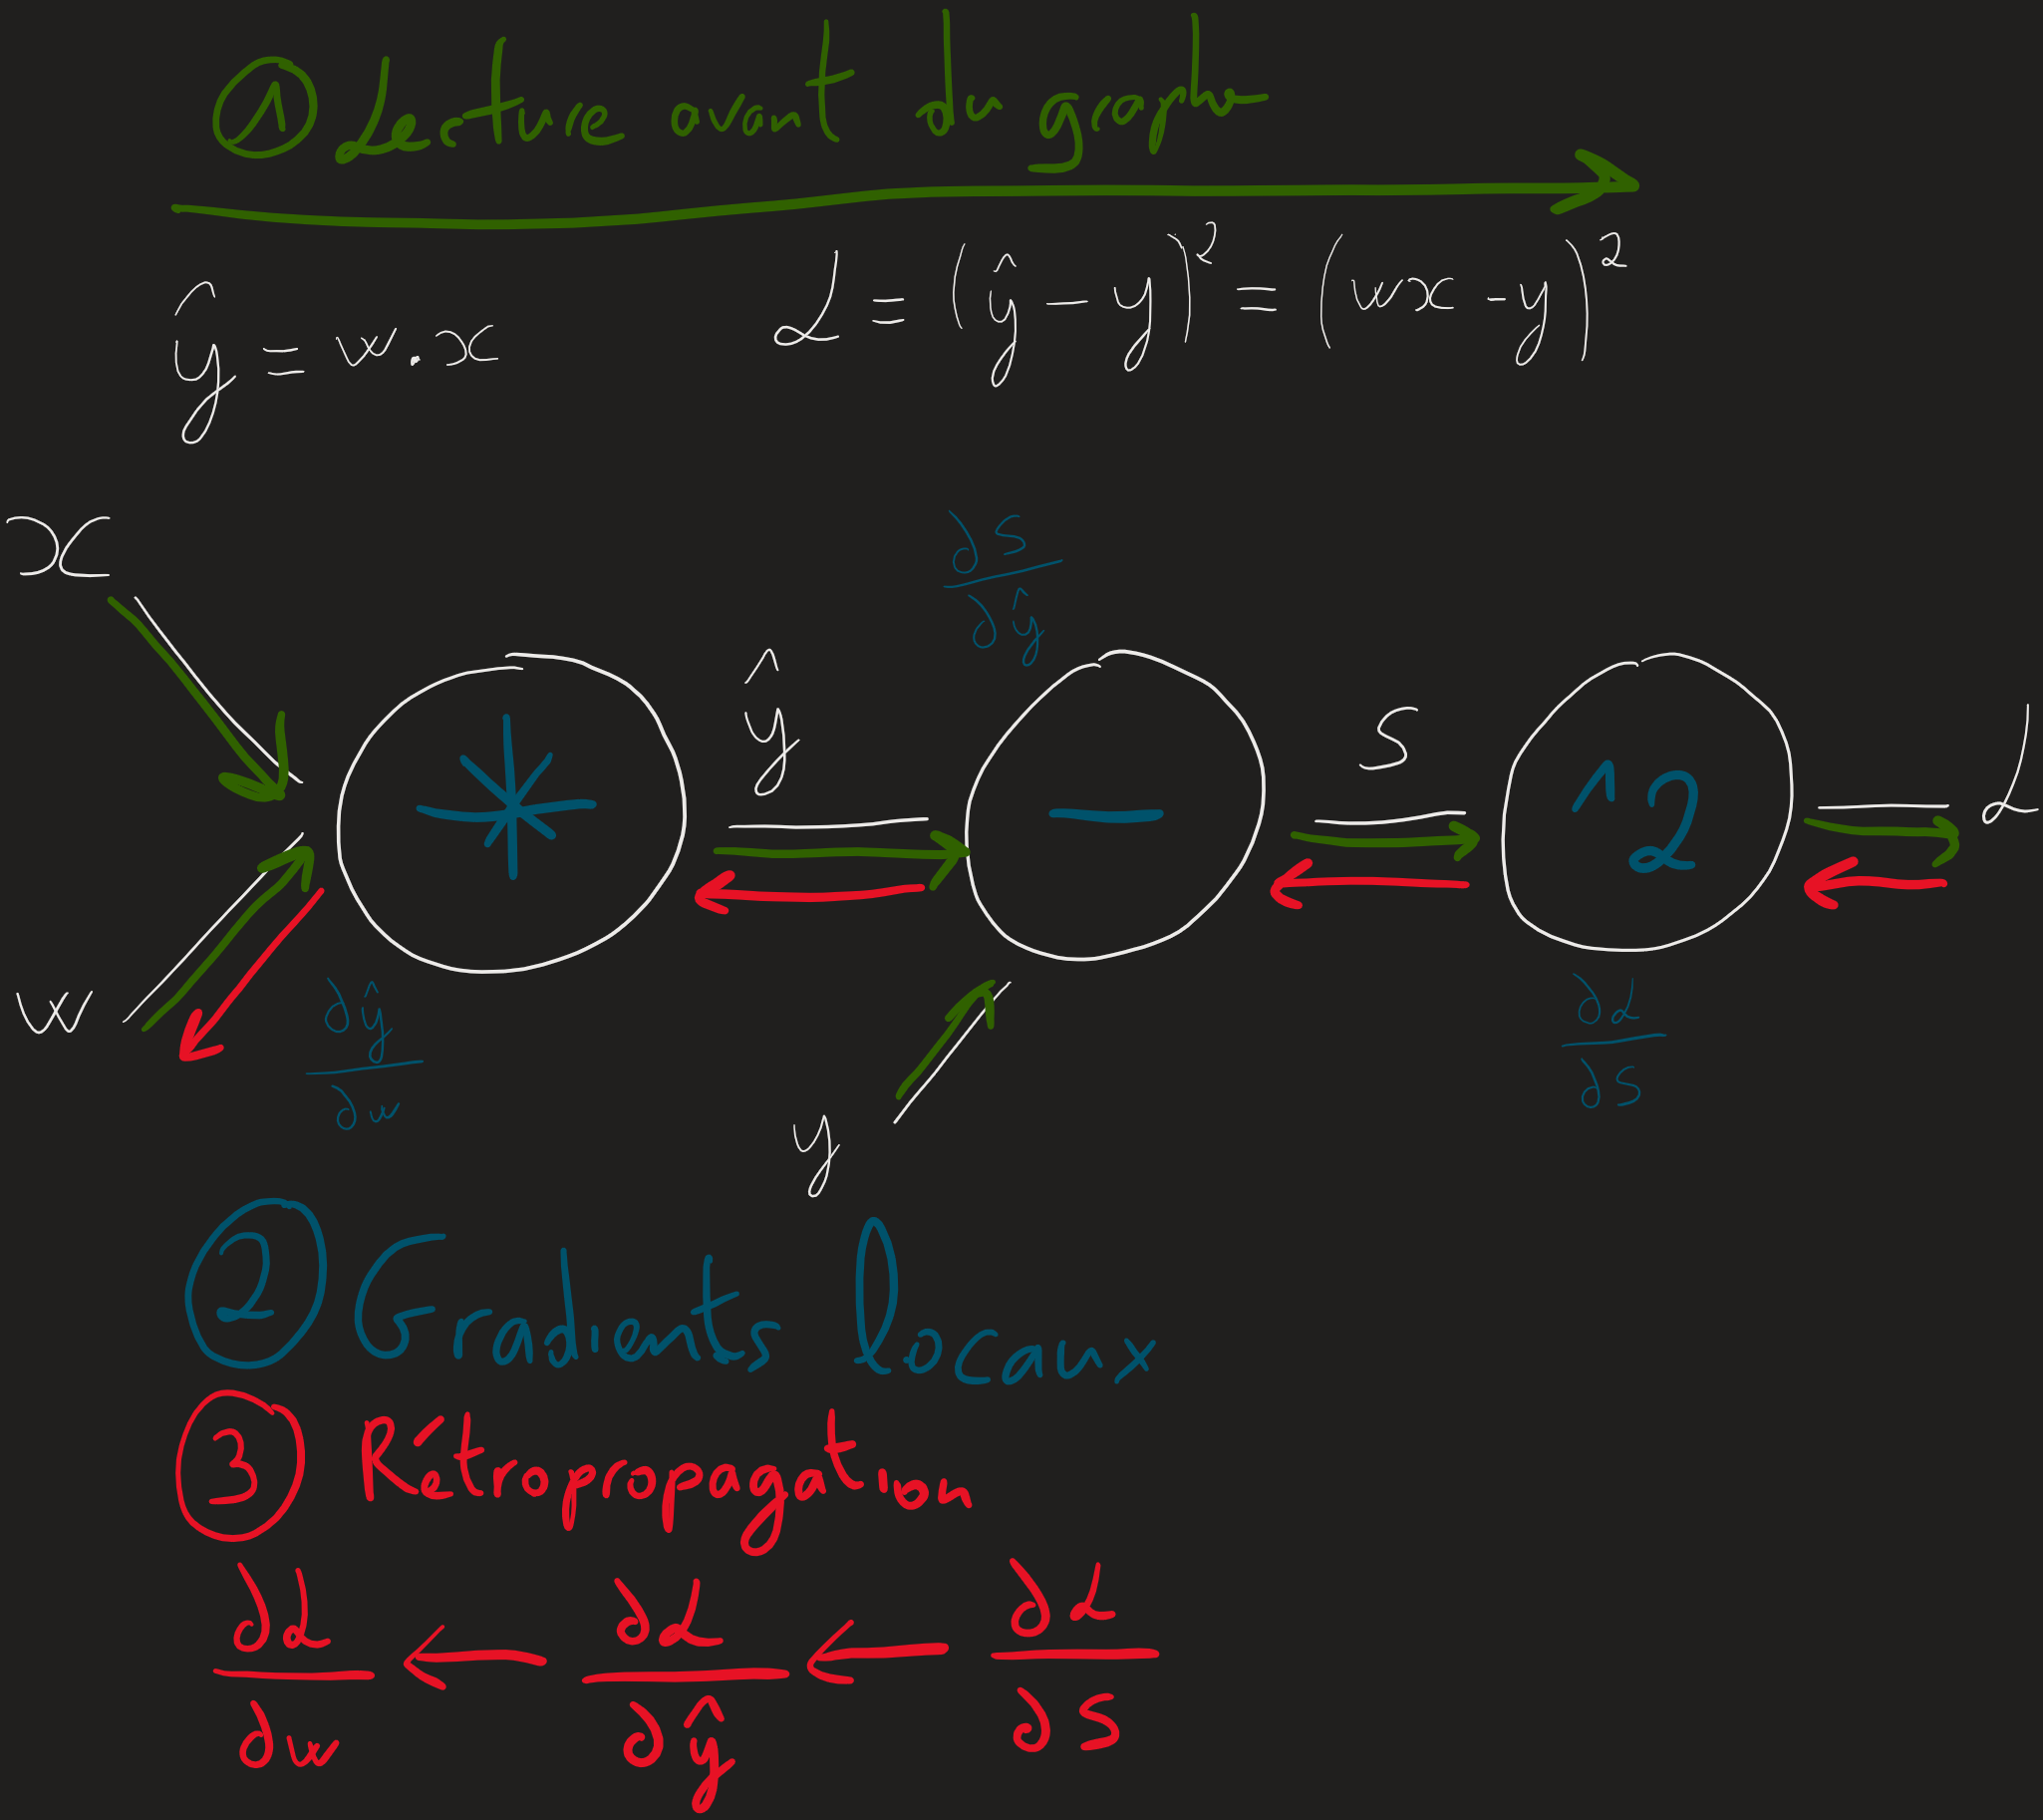

Donnons maintenant des valeurs à nos entrées. Supposons que __x = 1__, __y = 2__ et __w = 1__. Ces entrées sont les paramètres que l'on initialise au début de la boucle d'apprentissage. Suivons maintenant les étapes une par une :

    1. On lit le graphe en avant : on obtient donc ŷ = x.w = 1.1 = 1, ensuite S = ŷ - y = 1 - 2 = -1 enfin L = S² = (-1)² = 1. Notre regret L est donc estimé à 1. 
    2. On calcule les gradients locaux : dL/dS = dS²/dS = 2S ; dS/dŷ = d(ŷ-y)/dŷ = dŷ/dŷ - dy/dŷ = 1 - 0 = 1 ; dŷ/dw = dxw/dw = x. Nous ne sommes bas obligés de connaître dx et dy car ces paramètres sont
       fixés.
    3. Rétropropagation : On cherche dL/dw que l'on obtient par la règle de la chaine. On a donc dL/dŷ = dL/dS * dS/dŷ = 2S = -2 ; dL/dw = dL/dŷ * dŷ/dw = -2x = -2

Le gradient final est donc de -2. Vérifions si PyTorch récupère le même gradient que nous.

In [1]:
import torch

In [3]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

In [4]:
w = torch.tensor(1.0, requires_grad=True)

In [5]:
# Lecture avant du graphe

y_chap = w * x
L = (y_chap - y)**2

L

tensor(1., grad_fn=<PowBackward0>)

In [6]:
# Rétropropagation

L.backward()
w.grad

tensor(-2.)

PyTorch obtient bien le même résultat que nous, notre méthode marche ! Nous pouvons maintenant modifier nos poids et effectuer une autre itération jusqu'à arriver à un minimum local !

___

C'est la fin de ce cours, merci d'avoir été attentif, et nous nous retrouverons au prochain cours sur la création et l'optimisation automatique d'un modèle.